# Lebarbé et al (2012): Mid-sternum hub impact


- Performed by: Yash Niranjan Poojary
- Reviewed by:
- Last modified :  7th January 2024
- SAFER HBM Version: ![Static Badge](https://img.shields.io/badge/SAFER_HBM-11.0-1?style=flat&logoColor=blue&labelColor=whitw&color=blue)
- LSDYNA version:  `mpp d R12.2.1 `

## Experiments used by Lebarbé et al (2012)
### Summary:

The simulated outputs are compared to the references from PMHS tests reported by the Kroell et al. [2], Bouquet et al. [3] and Trosseille et al. [4]
1. LEBARBÉ, M.; PETIT, P. New biofidelity targets for the thorax of a 50th percentile adult male in frontal impact. In: Proceedings of the 2012 IRCOBI Conference. 2012.[Article](http://www.ircobi.org/wordpress/downloads/irc12/pdf_files/89.pdf)
2. KROELL, Charles K.; SCHNEIDER, Dennis C.; NAHUM, Alan M. Impact tolerance and response of the human thorax II. SAE Transactions, 1974, 3724-3762.[Article](https://www.jstor.org/stable/pdf/44723986.pdf)
3. BOUQUET, Robert, et al. Thoracic and pelvis human response to impact. In: Proc. 14th International Technical Conference on the Enhanced Safety of Vehicles. 1994. p. 100-109.
4. TROSSEILLE, Xavier, et al. Rib cage strain pattern as a function of chest loading configuration. SAE Technical Paper, 2008.


<!-- ![Isometric view](../_env/setup_lebarbe_S11.png)  -->
```{figure} ../_env/setup_lebarbe_S11.png
---
align: center
---
Hub impact to mid sternum
```

### Information on the subjects/specimens
- `Coordinate system `    : aligned with Global in simulations
- `Load case`    : mid sternal blunt hub impact
- Series of 38 impactor tests from four sources: Kroell et al. [2], Bouquet et al. [3] and Trosseille et al. [4]. 

#### Impactor modelling and position
- A rigid 152 mm diameter cylindrical impactor wing 23.4 kg is used.
- The impactor is aligned to the sternum at the 4th rib interspace.

#### Loading and Boundry conditions            : 
- The hub was impacted with two `INITIAL_VELOCITY`, 4.3 m/s and 6.6m/s.
- The PMHS was seated upright without any back support. (rotated $20^0$ for the SHBM V10.0)
- No gravity defined in the simulations.
-  `*CONTACT_AUTOMATIC_SURFACE_TO_SURFACE` with $fs=0.3 , vdc=20, soft=2$ was set between the impactor and the HBM (without the arms `PID`).

### Responses recorded
- Contact force is measured at the impactor and HBM.
- Relative impactor displacement of the rigid impactor with respect to the spine is measured.
- The reference values from the paper were digitalised [2]  and are incuded in the notebook. The data corresponds to the unnormalised corridors.

### Other references
2.	Drevon D, Fursa SR, Malcolm AL. Intercoder reliability and validity of WebPlotDigitizer in extracting graphed data. Behavior modification. 2017;41(2):323-39. 
3. Larsson K-J, Blennow A, Iraeus J, Pipkorn B, Lubbe N. [Rib cortical bone fracture risk as a function of age and rib strain: Updated injury prediction using finite element human body models](https://www.frontiersin.org/articles/10.3389/fbioe.2021.677768/full). Frontiers in bioengineering and biotechnology. 2021;9:677768.


In [1]:
import os
import glob
# for data analysis
import pandas as pd
import numpy as np
# packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import sys


In [5]:
# Plot formats
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1)
s11 = {"linestyle" :'-', "color" : 'b',"alpha" :1,"linewidth":2}
exp_limits = {"linestyle" :'--', "color" : 'k',"alpha" : 0.7,"linewidth":1}
exp_mean = {"linestyle" :'-', "color" : 'k',"alpha" : 0.7,"linewidth":2}

# Dataframe formats
def select_col(x):
    mask = x['Overall Score'] <0.5
    df1 =  pd.DataFrame('', index=x.index, columns=x.columns)
    df1.loc[mask,'Overall Score'] = 'color:crimson;font-weight:bold;'
    return df1
heading = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "120%"),
                   ("font-weight", "bold")])]
content={'text-align': 'center'}

In [6]:
binout_path_sim={}
result_output_dir={}
Tests=["4.3","6.6"]

figures_dir = "../data/processed/SAFER11.0/figures/"
processed_data_dir = f"../data/processed/SAFER11.0"
experiment_dir= "../data/experiment_data/"


if not os.path.exists(figures_dir): 
    os.makedirs(figures_dir)
if not os.path.exists(processed_data_dir): 
    os.makedirs(processed_data_dir)

for test in Tests:
    binout_path_sim[test] = test
    result_output_dir[test] = os.path.join(processed_data_dir, binout_path_sim[test])
    if not os.path.exists(result_output_dir[test]): 
        os.makedirs(result_output_dir[test])


## Postprocessing with dynasaur

In [7]:
# Import the dynasaur library
from dynasaur.plugins.data_visualization_controller import DataVisualizationController

In [8]:
# Path to Dynasaur definition files

# Dynasaur object definitions
dynasaur_ids = ["../_env/01_impactor_IDs.def","../../model/SAFER_11.0/postprocessing/21_rib_strain_parts.def","../../model/SAFER_11.0/postprocessing/00_SAFER_ID_V11.def"]

# Dynasaur calculation definitions
dynasaur_calculation_defs = [ "../_env/02_Calculation_procedures.def","../../model/SAFER_11.0/postprocessing/01_energy_calculation.def","../../model/SAFER_11.0/postprocessing/20_rib_strain_calculator.def"]

In [9]:
sim_output={}
for test in Tests:
    sim = DataVisualizationController(calculation_procedure_def_file=dynasaur_calculation_defs,
                                                  object_def_file=dynasaur_ids,
                                                  data_source= binout_path_sim[test] +'/binout*')
    commands = sim.get_defined_calculation_procedures()
    print(commands)
    for command in sim.get_defined_calculation_procedures():
        sim.calculate(command)
    sim.write_CSV(result_output_dir[test], filename="Dynasaur_output.csv")

    sim_output[test]=pd.read_csv(os.path.join(result_output_dir[test],"Dynasaur_output.csv"), delimiter=';', na_values='-', header = [0,1,2,3])

[READ DYNASAUR DEF]	read ../_env/02_Calculation_procedures.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/20_rib_strain_calculator.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env/01_impactor_IDs.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/21_rib_strain_parts.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/00_SAFER_ID_V11.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read rcforc data ...
[READ BINOUT]	done reading rcforc!
[READ BINOUT]	read nodout data ...
[READ BINOUT]	done reading nodout!
[READ BINOUT]	read glstat data ...
[READ BINOUT]	done reading glstat!
[READ BINOUT]	read elout data ...
[READ BINOUT]	elout: initialize stress shell
[READ BINOUT]	assign stresses for shell elements
[READ BINOUT]	extract data took : 11.502557754516602
[READ BINOUT]	calc eigenvalue
[READ BINOUT]	calc eigenvalues took : 7.784034490585327
[READ 

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: Bone_Sternum_x
[DATA]	read id 4900720 from channel name: x_coordinate
[CALCULATION]	Calculating Visualization: Bone_T8_COG_x
[DATA]	read id 4900280 from channel name: x_coordinate
[CALCULATION]	Calculating Visualization: IMPACTOR_Disp_x
[DATA]	read id 9010000 from channel name: x_displacement
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	Calculating Visualization: Rib_strain_R1
[CALCU

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: Bone_Sternum_x
[DATA]	read id 4900720 from channel name: x_coordinate
[CALCULATION]	Calculating Visualization: Bone_T8_COG_x
[DATA]	read id 4900280 from channel name: x_coordinate
[CALCULATION]	Calculating Visualization: IMPACTOR_Disp_x
[DATA]	read id 9010000 from channel name: x_displacement
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	Calculating Visualization: Rib_strain_R1
[CALCU

In [10]:
exp_data=pd.read_csv(os.path.join(experiment_dir,'data.csv'), delimiter=';',na_values='-', header = [0,1])

### Force deflection Plot

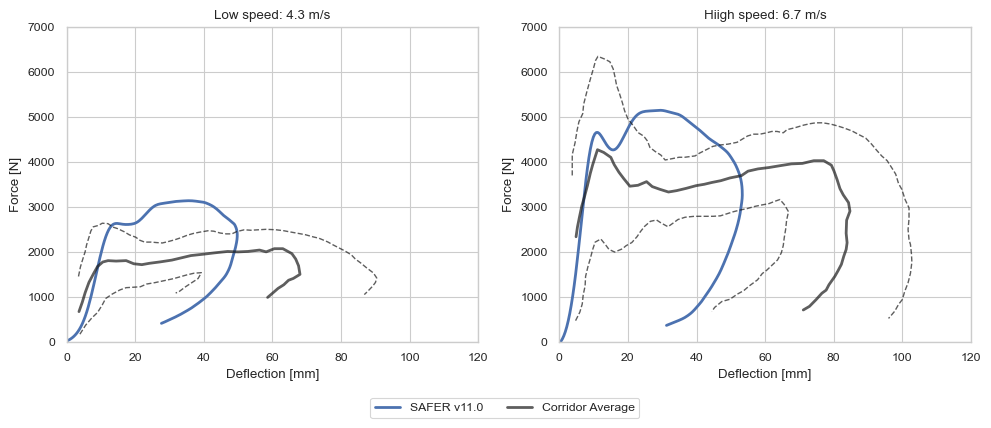

In [11]:
fig_fd, axs = plt.subplots(nrows=1, ncols=2,figsize=(10,4))
# cd_low=sim_output[Tests[0]].Bone.T8_COG_x.displacement - sim_output[Tests[0]].Bone.Sternum_x.displacement
cd_low=sim_output[Tests[0]].Bone.T8_COG_x.displacement - sim_output[Tests[0]]['IMPACTOR']['Disp_x']['displacement']
# cd_high=sim_output[Tests[1]].Bone.T8_COG_x.displacement - sim_output[Tests[1]].Bone.Sternum_x.displacement
cd_high=sim_output[Tests[1]].Bone.T8_COG_x.displacement - sim_output[Tests[1]]['IMPACTOR']['Disp_x']['displacement']
# axs[0].plot(-sim_output[Tests[0]]['IMPACTOR']['Disp_x']['displacement'], sim_output[Tests[0]]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force']*1000,**s11, label = "SAFER v10.0")
axs[0].plot(cd_low.iloc[:450] -cd_low.iloc[0]-7,sim_output[Tests[0]]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'].iloc[:450]*1000,**s11, label = "SAFER v11.0")

axs[0].plot(exp_data['low_speed_4_3_mean'].X, exp_data['low_speed_4_3_mean'].Y,**exp_mean,label='Corridor Average')
axs[0].plot(exp_data['low_speed_4_3_max'].X, exp_data['low_speed_4_3_max'].Y,**exp_limits)
axs[0].plot(exp_data['low_speed_4_3_min'].X, exp_data['low_speed_4_3_min'].Y,**exp_limits)
axs[0].set(title="Low speed: 4.3 m/s", xlabel ="Deflection [mm]", ylabel="Force [N]", xlim=(0,120),ylim=(0,7000));

# axs[1].plot(-sim_output[Tests[1]]['IMPACTOR']['Disp_x']['displacement'], sim_output[Tests[1]]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force']*1000,**s11, label = "SAFER v10.0")
axs[1].plot(cd_low.iloc[:450] -cd_low.iloc[1]-3,sim_output[Tests[1]]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'].iloc[:450]*1000,**s11)

axs[1].plot(exp_data['high_speed_6_7_mean'].X, exp_data['high_speed_6_7_mean'].Y,**exp_mean)
axs[1].plot(exp_data['high_speed_6_7_max'].X, exp_data['high_speed_6_7_max'].Y,**exp_limits)
axs[1].plot(exp_data['high_speed_6_7_min'].X, exp_data['high_speed_6_7_min'].Y,**exp_limits)
axs[1].set(title="Hiigh speed: 6.7 m/s", xlabel ="Deflection [mm]", ylabel="Force [N]", xlim=(0,120),ylim=(0,7000));

fig_fd.legend( bbox_to_anchor=(0.65,0.01),ncols=2)
fig_fd.tight_layout()

### Energy plots

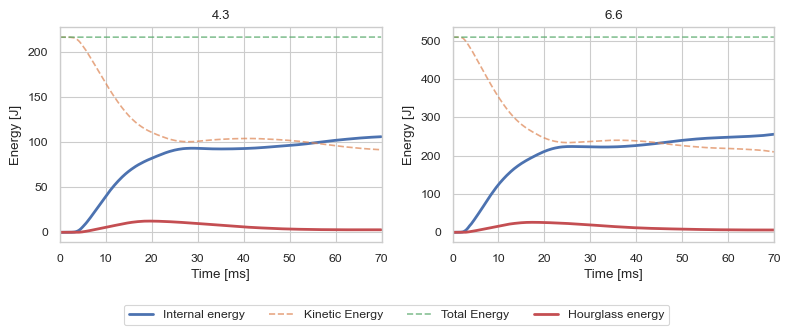

In [12]:
fig_fd, axs = plt.subplots(nrows=1, ncols=2,figsize=(8,3))
i=0
for ax in axs.flat:
    ax.plot(sim_output[Tests[i]].MODEL.Internal_Energy.time,sim_output[Tests[i]].MODEL.Internal_Energy.energy,linewidth=2)
    ax.plot(sim_output[Tests[i]].MODEL.Kinetic_Energy.time,sim_output[Tests[i]].MODEL.Kinetic_Energy.energy,linestyle='--',alpha=0.7)
    ax.plot(sim_output[Tests[i]].MODEL.Total_Energy.time,sim_output[Tests[i]].MODEL.Total_Energy.energy,linestyle='--',alpha=0.7)
    ax.plot(sim_output[Tests[i]].MODEL.Hourglass_Energy.time,sim_output[Tests[i]].MODEL.Hourglass_Energy.energy,linewidth=2)
    ax.set(title="{}".format(Tests[i]),xlabel='Time [ms]',ylabel='Energy [J]',xlim=[0,70])
    i=i+1
fig_fd.legend(["Internal energy","Kinetic Energy","Total Energy","Hourglass energy"], bbox_to_anchor=(0.85,-0.01),ncol=4);
fig_fd.tight_layout()

### Strain based rib fractures

In [13]:
# import updated user functions for rib assessment
sys.path.append('../../model/SAFER_11.0/postprocessing/')
from fracture_risk_calculator import HBM_rib_risk

In [14]:
lebarbe=HBM_rib_risk(sim_output)

#### Low Speed : 4.3 m/s
- Tests with PMHS being possible "Outliers" according to lebarbe [1] are dropped.
- Only male PMHS are considered for injury validaton

| **PMHS #** | **Age** | **NFR** | **Height [cm]** | **Weight [kg]** |
| :--------: | :-----: | :-----: | :------------: | :-------------: |
|   MRS01    |   76    |    0    |      173       |       82        |
|   MRS05    |   66    |    0    |      175       |       69        |
|   MRS03    |   57    |    0    |      174       |       76        |
|    60FM    |   66    |    9    |      180       |      79.4       |
|   MS589    |   88    |   20    |      169       |       60        |
|    42FM    |   61    |    0    |      183       |      54.4       |
|    45FM    |   64    |   10    |      181       |       64        |
|    53FM    |   75    |    3    |      174       |      77.1       |
|   MRS04    |   57    |    1    |      174       |       76        |
|   MRS06    |   66    |   11    |      172       |       69        |

##### Rib strains

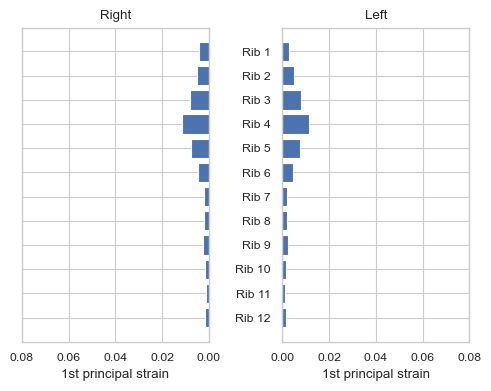

In [15]:
lebarbe.plot_rib_strains("4.3")

##### Fracture risk

Test: NFR1+ [%],60.0
SHBM NFR1+ [%],9.1
Test: NFR2+ [%],50.0
SHBM NFR2+ [%],0.5
Test: NFR3+ [%],50.0
SHBM NFR3+ [%],0.0


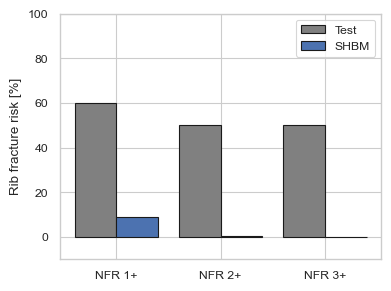

In [16]:
age=[76,66,57,66,88,61,64,75,57,66]
risks={}
for a in age:
    N1p,N2p,N3p=lebarbe.fx_matrix("4.3",a)
    risks['NFR1+',a]=N1p
    risks['NFR2+',a]=N2p
    risks['NFR3+',a]=N3p
    
df_fractures = pd.DataFrame(columns=['Test: NFR1+ [%]', 'SHBM NFR1+ [%]','Test: NFR2+ [%]', 'SHBM NFR2+ [%]', 'Test: NFR3+ [%]','SHBM NFR3+ [%]'])
df_fractures['Test: NFR1+ [%]']=[60]
df_fractures['Test: NFR2+ [%]']=50
df_fractures['Test: NFR3+ [%]']=50
df_fractures['SHBM NFR1+ [%]']=pd.DataFrame(risks)['NFR1+'].mean(axis=1).round(1)
df_fractures['SHBM NFR2+ [%]']=pd.DataFrame(risks)['NFR2+'].mean(axis=1).round(1)
df_fractures['SHBM NFR3+ [%]']=pd.DataFrame(risks)['NFR3+'].mean(axis=1).round(1)
df_fractures.to_csv(os.path.join(result_output_dir["4.3"], "rib_fracture_risks.csv"))
lebarbe.plot_PMHS_HBM_matrix(df_fractures)
df_fractures.T.style.hide(axis="columns").format(precision=1).set_caption("Injury Matrix").set_table_styles(heading).set_properties(**content)


#### High Speed : 6.6 m/s
- Tests with PMHS being possible "Outliers" according to lebarbe [1] are dropped.
- Only male PMHS are considered for injury validaton

| **PMHS #** | **Age** | **NFR** | **Height [cm]** | **Weight [kg]** |
| :--------: | :-----: | :-----: | :-------------: | :-------------: |
|    18FM    |   78    |   14    |       177       |      65.8       |
|    22FM    |   72    |   17    |       183       |      74.8       |
|    19FM    |   19    |    0    |       196       |      71.2       |
|    20FM    |   29    |    0    |       180       |      56.7       |
|    15FM    |   80    |   13    |       165       |      53.1       |
|    64FM    |   72    |    6    |       163       |       63        |
|    36FM    |   52    |    7    |       183       |      74.8       |
|    46FM    |   46    |    0    |       178       |      94.8       |
|    13FM    |   81    |   21    |       168       |      76.2       |
|    34FM    |   64    |   13    |       178       |       59        |
|    24FM    |   65    |   24    |       183       |      81.6       |
|    37FM    |   48    |    9    |       179       |      73.9       |
|    32FM    |   75    |   20    |       171       |      54.4       |
|    31FM    |   51    |   14    |       183       |      74.8       |

##### Rib strains

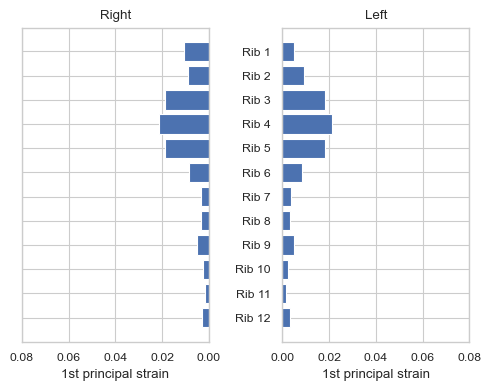

In [17]:
lebarbe.plot_rib_strains("6.6")

##### Fracture risk

Test: NFR1+ [%],78.6
SHBM NFR1+ [%],77.3
Test: NFR2+ [%],78.6
SHBM NFR2+ [%],55.7
Test: NFR3+ [%],78.6
SHBM NFR3+ [%],35.8


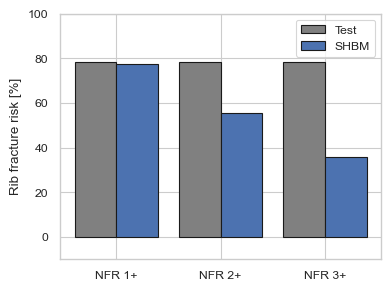

In [18]:
age=[78,72,19,29,49,80,72,52,67,76,46,46,81,58,64,65,48,75,46,51]
risks={}
for a in age:
    N1p,N2p,N3p=lebarbe.fx_matrix("6.6",a)
    risks['NFR1+',a]=N1p
    risks['NFR2+',a]=N2p
    risks['NFR3+',a]=N3p
    
df_fractures = pd.DataFrame(columns=['Test: NFR1+ [%]', 'SHBM NFR1+ [%]','Test: NFR2+ [%]', 'SHBM NFR2+ [%]', 'Test: NFR3+ [%]','SHBM NFR3+ [%]'])
df_fractures['Test: NFR1+ [%]']=[78.6]
df_fractures['Test: NFR2+ [%]']=78.6
df_fractures['Test: NFR3+ [%]']=78.6
df_fractures['SHBM NFR1+ [%]']=pd.DataFrame(risks)['NFR1+'].mean(axis=1).round(1)
df_fractures['SHBM NFR2+ [%]']=pd.DataFrame(risks)['NFR2+'].mean(axis=1).round(1)
df_fractures['SHBM NFR3+ [%]']=pd.DataFrame(risks)['NFR3+'].mean(axis=1).round(1)
df_fractures.to_csv(os.path.join(result_output_dir["6.6"], "rib_fracture_risks.csv"))
lebarbe.plot_PMHS_HBM_matrix(df_fractures)
df_fractures.T.style.hide(axis="columns").format(precision=1).set_caption("Injury Matrix").set_table_styles(heading).set_properties(**content)